<a href="https://colab.research.google.com/github/VyniHenrique/AtvDS/blob/main/ATV_DS_REGRESSAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

In [1]:
!pip install kagglehub

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Set the path to the file you'd like to load
file_path = "StudentsPerformance.csv"

# Load the dataset directly using pandas since it's a local file
df = pd.read_csv(file_path)

print("First 5 records:", df.head())

First 5 records:    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


MAE: 4.13
MSE: 28.28
R²: 0.8838


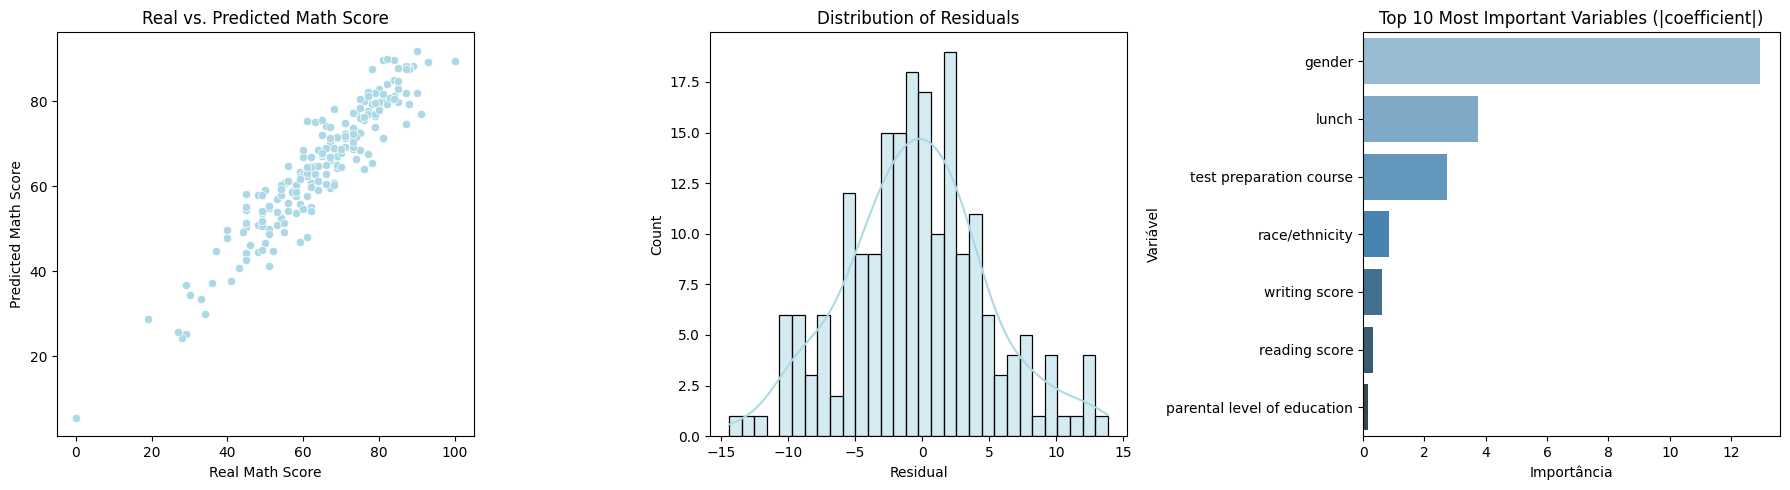

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Checking for null values (commented out as fillna handles it)
# nulls = df.isnull().sum()
# null_cols = nulls[nulls > 0].index.tolist()
# print("Colunas com valores nulos:", null_cols)

# 2. Fill missing values (using mode for categorical and median for numerical)
# As all columns are transformed to numeric, median fillna can be applied first.
# Then, if any NaNs remain (e.g., from completely non-numeric columns, though not expected here),
# they could be filled with 'None' or another appropriate placeholder after encoding.
# For 'StudentsPerformance.csv', there are no initial NaNs, but this step is good practice.
df_copy = df.copy() # Work on a copy to preserve original df for other models if needed

# Fill numerical NaNs with median (no NaNs in this dataset initially, but robust)
df_copy.fillna(df_copy.median(numeric_only=True), inplace=True)

# For any potential remaining NaNs in non-numeric columns after initial fill (if any), fill with a placeholder
# In this specific dataset, there are no initial NaNs, so this line might not change anything.
df_copy.fillna("None", inplace=True)

# 3. Encoding categorical variables
# Identify object columns before encoding them
cat_cols = df_copy.select_dtypes(include=["object"]).columns
for col in cat_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df[col]) # Fixed to use original df[col] for fitting LabelEncoder, then transform df_copy[col]

# 4. Separate features (X) and target (y)
# We'll use 'math score' as the target variable for this dataset
X = df_copy.drop(columns=["math score"])
y = df_copy["math score"]

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = model.predict(X_test)

# 8. Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# 9. Plotting results
plt.figure(figsize=(18, 5))

# Scatter plot of actual vs. predicted values
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, color='lightblue')
plt.xlabel("Real Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Real vs. Predicted Math Score")

# Distribution of residuals
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, color='lightblue', kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")

# 10. Feature Importance for Linear Regression (coefficients)
coefs = model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    "Variável": feature_names,
    "Coeficiente": coefs,
    "Importância": np.abs(coefs)
}).sort_values(by="Importância", ascending=False)

top_10 = coef_df.head(10)

# Bar plot of top 10 most important features
plt.subplot(1, 3, 3)
sns.barplot(x="Importância", y="Variável", data=top_10, hue="Variável", palette="Blues_d", legend=False)
plt.title("Top 10 Most Important Variables (|coefficient|)")

plt.tight_layout()
plt.show()

# Random Forest (Floresta Aleatória)


 Resultados do RandomForestRegressor:
MAE: 4.70
MSE: 36.79
R²: 0.8488


/tmp/ipython-input-2528556162.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importância", y="Variável", data=top_10, palette="Blues_d")


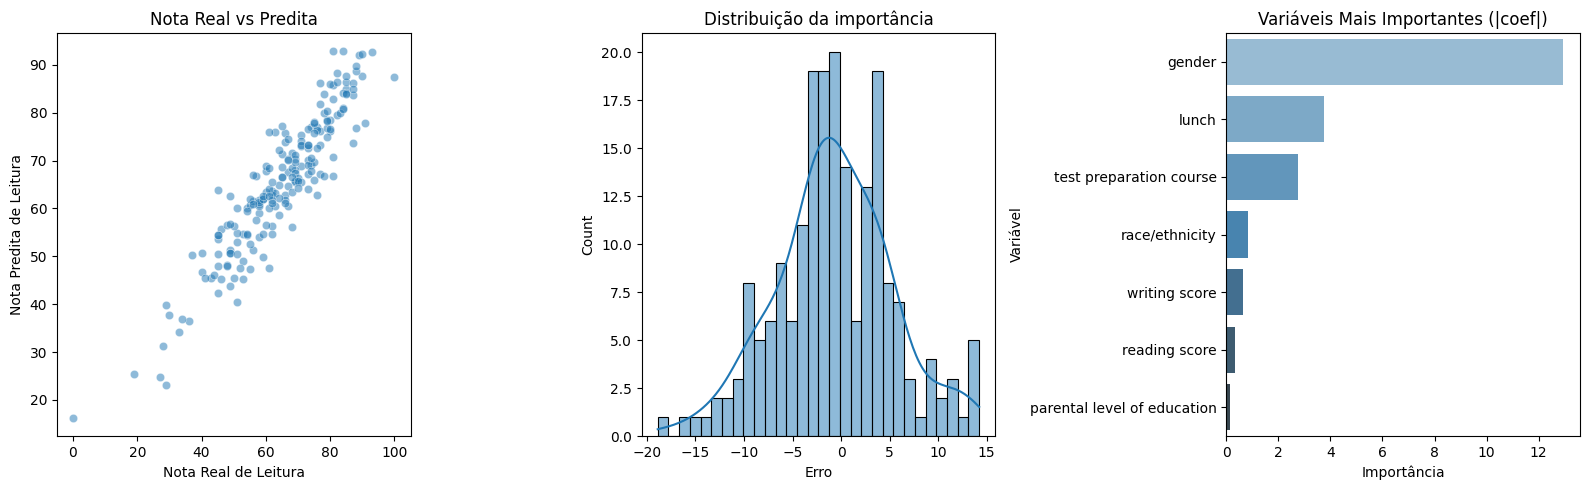

In [10]:
from sklearn.ensemble import RandomForestRegressor

# 6. Treinar modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Previsões
y_pred = rf.predict(X_test)

# 8. Avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n Resultados do RandomForestRegressor:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# 9. Gráfico: Preço real vs predito
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Nota Real de Leitura")
plt.ylabel("Nota Predita de Leitura")
plt.title("Nota Real vs Predita")

# 10. Gráfico: Distribuição dos resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribuição da importância")
plt.xlabel("Erro")

# 11. Importância das variáveis
coefs = model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    "Variável": feature_names,
    "Coeficiente": coefs,
    "Importância": np.abs(coefs)
}).sort_values(by="Importância", ascending=False)

top_10 = coef_df.head(10)

# Gráfico de importância
plt.subplot(1, 3, 3)
sns.barplot(x="Importância", y="Variável", data=top_10, palette="Blues_d")
plt.title("Variáveis Mais Importantes (|coef|)")

plt.tight_layout()
plt.show()


#XGBoost

In [12]:
!pip install xgboost


📊 Resultados do XGBoost:
MAE: 4.66
MSE: 35.53
R²: 0.8540


/tmp/ipython-input-2742750427.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importância", y="Variável", data=top_10, palette="Blues_d")


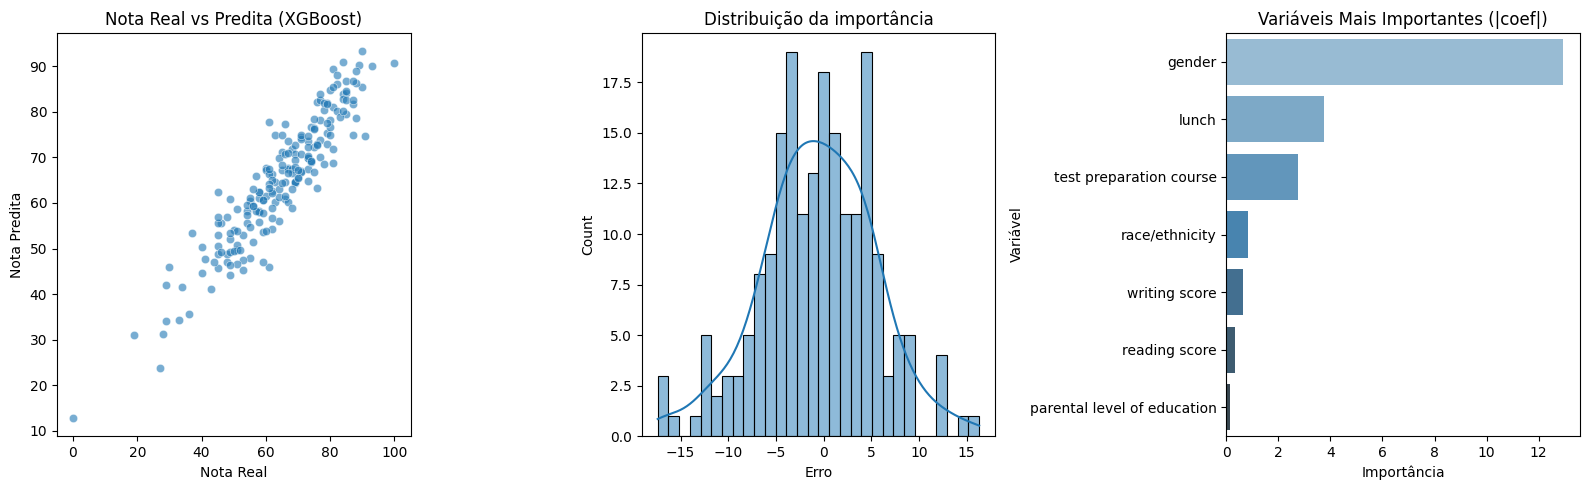

In [13]:
from xgboost import XGBRegressor, plot_importance

# 5. Treinar modelo XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# 6. Previsões
y_pred = xgb.predict(X_test)

# 7. Avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Resultados do XGBoost:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# 8. Gráficos
plt.figure(figsize=(16, 5))

# Real vs Predito
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Nota Real")
plt.ylabel("Nota Predita")
plt.title("Nota Real vs Predita (XGBoost)")

# Resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribuição da importância")
plt.xlabel("Erro")

# 11. Importância das variáveis
coefs = model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    "Variável": feature_names,
    "Coeficiente": coefs,
    "Importância": np.abs(coefs)
}).sort_values(by="Importância", ascending=False)

top_10 = coef_df.head(10)

# Gráfico de importância
plt.subplot(1, 3, 3)
sns.barplot(x="Importância", y="Variável", data=top_10, palette="Blues_d")
plt.title("Variáveis Mais Importantes (|coef|)")

plt.tight_layout()
plt.show()

#Comparando desempenhos

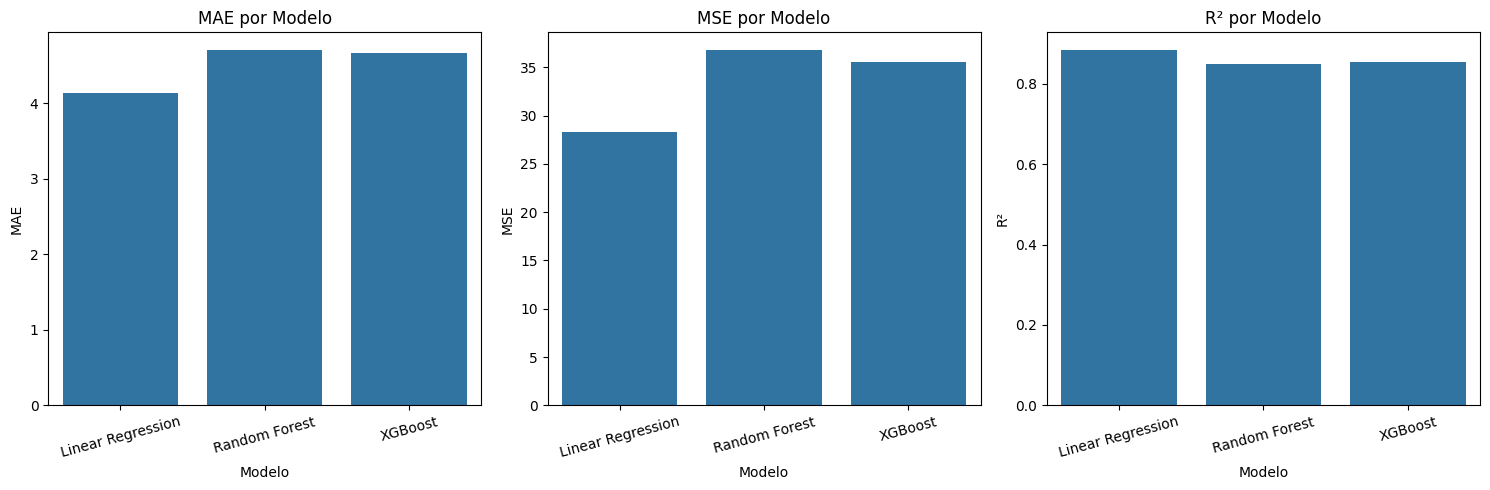


📋 Tabela de métricas comparativas:
              Modelo   MAE    MSE    R²
0  Linear Regression  4.13  28.28  0.88
1      Random Forest  4.70  36.79  0.85
2            XGBoost  4.66  35.53  0.85


In [14]:
# Dicionário para armazenar as métricas
results = {}

# Função para treinar modelo, prever e calcular métricas
def avaliar_modelo(nome, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[nome] = {"MAE": mae, "MSE": mse, "R²": r2}

# Treinar e avaliar os três modelos
avaliar_modelo("Linear Regression", LinearRegression())
avaliar_modelo("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42))
avaliar_modelo("XGBoost", XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))

# Converter resultados em DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Modelo"})

# Gráficos de comparação
plt.figure(figsize=(15, 5))

# MAE
plt.subplot(1, 3, 1)
sns.barplot(data=results_df, x="Modelo", y="MAE")
plt.title("MAE por Modelo")
plt.xticks(rotation=15)

# MSE
plt.subplot(1, 3, 2)
sns.barplot(data=results_df, x="Modelo", y="MSE")
plt.title("MSE por Modelo")
plt.xticks(rotation=15)

# R²
plt.subplot(1, 3, 3)
sns.barplot(data=results_df, x="Modelo", y="R²")
plt.title("R² por Modelo")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# Exibir os valores também
print("\n📋 Tabela de métricas comparativas:")
print(results_df.round(2))